In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
import sqlite3
import pandas as pd

# Create the connection
# cnx = sqlite3.connect(r'ironate.db')

sqlite_file = 'ironate.db'
conn = sqlite3.connect(sqlite_file)
cursor = conn.cursor()
# create the dataframe from a query
# df = pd.read_sql_query("SELECT * FROM irony_comment", cnx)

# labels = pd.read_sql_query("SELECT * FROM *", cnx)
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", cnx)
tables

,name
0,auth_permission
1,auth_group_permissions
2,auth_group
3,auth_user_groups
4,auth_user_user_permissions
5,django_content_type
6,django_session
7,irony_comment
8,irony_commentsegment
9,irony_label


In [145]:
# Data from the sqlite db
data_2 = pd.read_sql_query("SELECT * FROM irony_commentsegment", cnx)
data_2.head()

,id,comment_id,segment_index,text
0,1,1,0,I suspect atheists are projecting their desire...
1,2,1,1,Does anyone remember the crazy preacher with ...
2,3,1,2,\nhttp://www.
3,4,1,3,examiner.
4,5,1,4,com/article/obama-and-wright-throw-each-other-...


In [146]:
labels = pd.read_sql_query("SELECT * FROM irony_label", cnx)
labels.head()

,id,segment_id,comment_id,labeler_id,label,confidence,time_given,viewed_thread,viewed_page,forced_decision
0,1,1.0,1,2,-1,2,2013-12-05,0,0,0
1,2,2.0,1,2,-1,2,2013-12-05,0,0,0
2,3,3.0,1,2,-1,2,2013-12-05,0,0,0
3,4,4.0,1,2,-1,2,2013-12-05,0,0,0
4,5,5.0,1,2,-1,2,2013-12-05,0,0,0


In [147]:
data_2 = pd.merge(left=data_2,right=labels, left_on='id', right_on='id')
data_2.drop(['segment_id', 'comment_id_y', 'labeler_id', 'confidence', 
             'time_given', 'viewed_thread', 'viewed_page', 'forced_decision', 
             'comment_id_x', 'segment_index'], inplace = True, axis = 1)

data_2.head()
# data['label'] = labels['label'].copy()
# data

,id,text,label
0,1,I suspect atheists are projecting their desire...,-1
1,2,Does anyone remember the crazy preacher with ...,-1
2,3,\nhttp://www.,-1
3,4,examiner.,-1
4,5,com/article/obama-and-wright-throw-each-other-...,-1


In [148]:
data_2.dropna(inplace=True)
data_2.reset_index(inplace = True)
data_2.drop(['index'], axis = 1, inplace = True)
data_2.drop(data_2[data_2.label == 0].index, inplace=True)
print(data_2.shape)
data_2.head()

(28759, 3)


,id,text,label
0,1,I suspect atheists are projecting their desire...,-1
1,2,Does anyone remember the crazy preacher with ...,-1
2,3,\nhttp://www.,-1
3,4,examiner.,-1
4,5,com/article/obama-and-wright-throw-each-other-...,-1


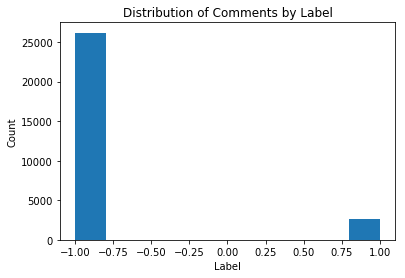

In [149]:
# Explore distribution of the data by label (0 -> non-sarcastic, 1 -> sarcastic)
plt.hist(data_2.label)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Comments by Label')
plt.show()

In [150]:
# Explore distribution of comments by label 
data_2.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
-1     26186.0  14419.248453  8344.231889   1.0  7187.25  14483.5  21691.75   
 1      2573.0  13980.559658  7851.490657  21.0  7229.00  13401.0  19976.00   

                
           max  
label           
-1     28759.0  
 1     28757.0

In [151]:
# Determine size and replacement values
size = 2573# sample size of each group being selected
replace = True  # with replacement
# Function used to pick random rows from the dataset
# We used the groupby('label') function to choose equal numbers 
# of sarcastic and non-sarcastic comments
fun = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
data_2 = data_2.groupby('label', as_index=False).apply(fun)
data_2.head()

id                                               text  label
0 24443  24444                  I don't even know what to say....     -1
  7262    7263  \n    \nWhen it was finished they said before ...     -1
  15659  15660   But he is young enough that he could have pla...     -1
  2208    2209       A press release right before a long holiday.     -1
  6118    6119  "\n\n"I don't think you should be giving out f...     -1

In [152]:
# Reset the indexes to remove the grouping into 0s and 1s
data_2.reset_index(inplace = True)
# Delete the columns that include the names of the indexes created from the groups
data_2.drop(['level_0', 'level_1'], inplace = True, axis = 1)
data_2.head()

,id,text,label
0,24444,I don't even know what to say....,-1
1,7263,\n \nWhen it was finished they said before ...,-1
2,15660,But he is young enough that he could have pla...,-1
3,2209,A press release right before a long holiday.,-1
4,6119,"""\n\n""I don't think you should be giving out f...",-1


In [153]:
# Explore distribution of comments by label 
data_2.groupby('label').describe()

id                                                             \
        count          mean          std   min     25%      50%      75%   
label                                                                      
-1     2573.0  14249.528177  8295.630385  15.0  7049.0  14427.0  21516.0   
 1     2573.0  13929.612515  7955.811019  21.0  7133.0  13076.0  20050.0   

                
           max  
label           
-1     28739.0  
 1     28757.0

In [10]:
#Import NLTK library
# !pip install nltk

# import nltk

# nltk.download("all")
# from nltk.corpus import stopwords #Use this to get rid of meaningless words like "the, and, a"
# from nltk.tokenize import word_tokenize #Split by word

In [154]:
#Make sure all the comment column is str data type
data_2['text'] = data_2['text'].astype(str)

# Split the comments into words
data_2['tok_comment'] = data_2['text'].apply(word_tokenize)
# Apply Parts of Speech tagging on the words
data_2['POS_tag'] = data_2['tok_comment'].apply(nltk.pos_tag)
# chosen_data.head()

# Apply stemming on the tokenized comments to get the roots of the words
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

data_2['stem'] = data_2['tok_comment'].apply(lambda x: [stemmer.stem(y) for y in x])
data_2.head()

,id,text,label,tok_comment,POS_tag,stem
0,24444,I don't even know what to say....,-1,"[I, do, n't, even, know, what, to, say, ..., .]","[(I, PRP), (do, VBP), (n't, RB), (even, RB), (...","[i, do, n't, even, know, what, to, say, ..., .]"
1,7263,\n \nWhen it was finished they said before ...,-1,"[When, it, was, finished, they, said, before, ...","[(When, WRB), (it, PRP), (was, VBD), (finished...","[when, it, was, finish, they, said, befor, you..."
2,15660,But he is young enough that he could have pla...,-1,"[But, he, is, young, enough, that, he, could, ...","[(But, CC), (he, PRP), (is, VBZ), (young, JJ),...","[but, he, is, young, enough, that, he, could, ..."
3,2209,A press release right before a long holiday.,-1,"[A, press, release, right, before, a, long, ho...","[(A, DT), (press, NN), (release, NN), (right, ...","[a, press, releas, right, befor, a, long, holi..."
4,6119,"""\n\n""I don't think you should be giving out f...",-1,"[``, '', I, do, n't, think, you, should, be, g...","[(``, ``), ('', ''), (I, PRP), (do, VBP), (n't...","[``, '', i, do, n't, think, you, should, be, g..."


In [155]:
joined_tag = []
for index, row in data_2.iterrows():
    joined_tag.append(' '.join([word + "_" + pos for word, pos in row['POS_tag']]))
data_2['joined_POS_tag'] = joined_tag.copy()
data_2.head()

,id,text,label,tok_comment,POS_tag,stem,joined_POS_tag
0,24444,I don't even know what to say....,-1,"[I, do, n't, even, know, what, to, say, ..., .]","[(I, PRP), (do, VBP), (n't, RB), (even, RB), (...","[i, do, n't, even, know, what, to, say, ..., .]",I_PRP do_VBP n't_RB even_RB know_VB what_WP to...
1,7263,\n \nWhen it was finished they said before ...,-1,"[When, it, was, finished, they, said, before, ...","[(When, WRB), (it, PRP), (was, VBD), (finished...","[when, it, was, finish, they, said, befor, you...",When_WRB it_PRP was_VBD finished_VBN they_PRP ...
2,15660,But he is young enough that he could have pla...,-1,"[But, he, is, young, enough, that, he, could, ...","[(But, CC), (he, PRP), (is, VBZ), (young, JJ),...","[but, he, is, young, enough, that, he, could, ...",But_CC he_PRP is_VBZ young_JJ enough_RB that_I...
3,2209,A press release right before a long holiday.,-1,"[A, press, release, right, before, a, long, ho...","[(A, DT), (press, NN), (release, NN), (right, ...","[a, press, releas, right, befor, a, long, holi...",A_DT press_NN release_NN right_NN before_IN a_...
4,6119,"""\n\n""I don't think you should be giving out f...",-1,"[``, '', I, do, n't, think, you, should, be, g...","[(``, ``), ('', ''), (I, PRP), (do, VBP), (n't...","[``, '', i, do, n't, think, you, should, be, g...",``_`` ''_'' I_PRP do_VBP n't_RB think_VB you_P...


In [13]:
!pip install -U textblob
from textblob import TextBlob

     |████████████████████████████████| 645kB 2.7MB/s eta 0:00:01


In [156]:
# Polarity for comment
blob_list = []
for index, row in data_2.iterrows():
    blob_list.append(TextBlob(row['text']))
data_2['textblob'] = blob_list.copy()

# chosen_data.head()

polarity_list = []
for index, row in data_2.iterrows():
    polarity_list.append(row['textblob'].sentiment.polarity)

data_2['polarity'] = polarity_list.copy()

print(data_2['polarity'].shape)
data_2.head()

(5146,)


,id,text,label,tok_comment,POS_tag,stem,joined_POS_tag,textblob,polarity
0,24444,I don't even know what to say....,-1,"[I, do, n't, even, know, what, to, say, ..., .]","[(I, PRP), (do, VBP), (n't, RB), (even, RB), (...","[i, do, n't, even, know, what, to, say, ..., .]",I_PRP do_VBP n't_RB even_RB know_VB what_WP to...,"( , I, , d, o, n, ', t, , e, v, e, n, , k, ...",0.000000
1,7263,\n \nWhen it was finished they said before ...,-1,"[When, it, was, finished, they, said, before, ...","[(When, WRB), (it, PRP), (was, VBD), (finished...","[when, it, was, finish, they, said, befor, you...",When_WRB it_PRP was_VBD finished_VBN they_PRP ...,"(\n, , , , , \n, W, h, e, n, , i, t, , w...",-0.125000
2,15660,But he is young enough that he could have pla...,-1,"[But, he, is, young, enough, that, he, could, ...","[(But, CC), (he, PRP), (is, VBZ), (young, JJ),...","[but, he, is, young, enough, that, he, could, ...",But_CC he_PRP is_VBZ young_JJ enough_RB that_I...,"( , B, u, t, , h, e, , i, s, , y, o, u, n, ...",-0.100000
3,2209,A press release right before a long holiday.,-1,"[A, press, release, right, before, a, long, ho...","[(A, DT), (press, NN), (release, NN), (right, ...","[a, press, releas, right, befor, a, long, holi...",A_DT press_NN release_NN right_NN before_IN a_...,"(A, , p, r, e, s, s, , r, e, l, e, a, s, e, ...",0.117857
4,6119,"""\n\n""I don't think you should be giving out f...",-1,"[``, '', I, do, n't, think, you, should, be, g...","[(``, ``), ('', ''), (I, PRP), (do, VBP), (n't...","[``, '', i, do, n't, think, you, should, be, g...",``_`` ''_'' I_PRP do_VBP n't_RB think_VB you_P...,"("", \n, \n, "", I, , d, o, n, ', t, , t, h, i...",0.290741


In [157]:
data_2['joined_stem'] = data_2['stem'].apply(lambda x: ' '.join(x))
data_2.head()

,id,text,label,tok_comment,POS_tag,stem,joined_POS_tag,textblob,polarity,joined_stem
0,24444,I don't even know what to say....,-1,"[I, do, n't, even, know, what, to, say, ..., .]","[(I, PRP), (do, VBP), (n't, RB), (even, RB), (...","[i, do, n't, even, know, what, to, say, ..., .]",I_PRP do_VBP n't_RB even_RB know_VB what_WP to...,"( , I, , d, o, n, ', t, , e, v, e, n, , k, ...",0.000000,i do n't even know what to say ... .
1,7263,\n \nWhen it was finished they said before ...,-1,"[When, it, was, finished, they, said, before, ...","[(When, WRB), (it, PRP), (was, VBD), (finished...","[when, it, was, finish, they, said, befor, you...",When_WRB it_PRP was_VBD finished_VBN they_PRP ...,"(\n, , , , , \n, W, h, e, n, , i, t, , w...",-0.125000,when it was finish they said befor you graduat...
2,15660,But he is young enough that he could have pla...,-1,"[But, he, is, young, enough, that, he, could, ...","[(But, CC), (he, PRP), (is, VBZ), (young, JJ),...","[but, he, is, young, enough, that, he, could, ...",But_CC he_PRP is_VBZ young_JJ enough_RB that_I...,"( , B, u, t, , h, e, , i, s, , y, o, u, n, ...",-0.100000,but he is young enough that he could have play...
3,2209,A press release right before a long holiday.,-1,"[A, press, release, right, before, a, long, ho...","[(A, DT), (press, NN), (release, NN), (right, ...","[a, press, releas, right, befor, a, long, holi...",A_DT press_NN release_NN right_NN before_IN a_...,"(A, , p, r, e, s, s, , r, e, l, e, a, s, e, ...",0.117857,a press releas right befor a long holiday .
4,6119,"""\n\n""I don't think you should be giving out f...",-1,"[``, '', I, do, n't, think, you, should, be, g...","[(``, ``), ('', ''), (I, PRP), (do, VBP), (n't...","[``, '', i, do, n't, think, you, should, be, g...",``_`` ''_'' I_PRP do_VBP n't_RB think_VB you_P...,"("", \n, \n, "", I, , d, o, n, ', t, , t, h, i...",0.290741,`` '' i do n't think you should be give out fr...


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [158]:
X_train, X_test, y_train, y_test = train_test_split(data_2[['joined_POS_tag', 'joined_stem', 'polarity']] , data_2.label, test_size=0.2, random_state=0)
X_train.head()

,joined_POS_tag,joined_stem,polarity
1936,No_DT shit_NN Sherlock_NNP ..._:,no shit sherlock ...,0.1
2509,Too_RB bad_JJ she_PRP started_VBD her_PRP chur...,too bad she start her church histori 3/4th of ...,-0.7
872,nytimes_NNS ._.,nytim .,0.0
831,The_DT good_JJ news_NN :_: it_PRP 's_VBZ a_DT ...,"the good news : it 's a short-term , self-dest...",0.7
1813,Take_VB Obamacare_NNP as_IN an_DT example_NN ._.,take obamacar as an exampl .,0.0


In [159]:
# TF-IDF to vectorize the data
import scipy.sparse as sp
from sklearn.feature_extraction.text import TfidfVectorizer
stem_vectorizer = TfidfVectorizer(ngram_range = (1,3)) # ask about max features
tfidf_stem = stem_vectorizer.fit_transform(X_train.joined_stem)

pos_vectorizer = TfidfVectorizer(ngram_range = (1,3))
tfidf_pos = pos_vectorizer.fit_transform(X_train.joined_POS_tag)

combined_2 = sp.hstack([tfidf_stem, tfidf_pos], format = 'csr')

# print(tfidf_stem.toarray())

# print(tfidf_stem.shape)
# print(tfidf_pos.shape)
# print(combined_2.shape)

# print(combined_2)

combined_3 = sp.hstack((combined_2,np.array(X_train.polarity)[:,None]))

## Test data vectorizing

# test_stem_vectorizer = TfidfVectorizer(max_features = 10000) # ask about max features
test_tfidf_stem = stem_vectorizer.transform(X_test.joined_stem)

# test_pos_vectorizer = TfidfVectorizer(max_features = 10000)
test_tfidf_pos = pos_vectorizer.transform(X_test.joined_POS_tag)

test_combined_2 = sp.hstack([test_tfidf_stem, test_tfidf_pos], format = 'csr')
test_combined_2.shape

test_combined_3 = sp.hstack((test_combined_2,np.array(X_test.polarity)[:,None]))

In [160]:
# Logistic Regression

log_clf = LogisticRegression(solver='lbfgs', max_iter = 300).fit(combined_3, y_train)

# Logistic regression score
print("Training score: ", log_clf.score(combined_3, y_train))
print("Test score: ", log_clf.score(test_combined_3, y_test))

Training score:  0.9846938775510204
Test score:  0.6951456310679611


In [112]:
# x = log_clf.predict(test_combined_3)
# for i in range(len(x)):
#     print(x[i])

In [161]:
# SVM model
svm_clf = LinearSVC()

# Training the model
svm_clf.fit(combined_3, y_train)

print("Training score: ", svm_clf.score(combined_3, y_train))
print("Test score: ", svm_clf.score(test_combined_3, y_test))

Training score:  0.9866375121477162
Test score:  0.6893203883495146


In [162]:
# Random Forest Classifier

rf_clf = RandomForestClassifier(n_estimators = 100)

rf_clf.fit(combined_3, y_train)

print("Training score: ", rf_clf.score(combined_3, y_train))
print("Test score: ", rf_clf.score(test_combined_3, y_test))

Training score:  0.9868804664723032
Test score:  0.6786407766990291


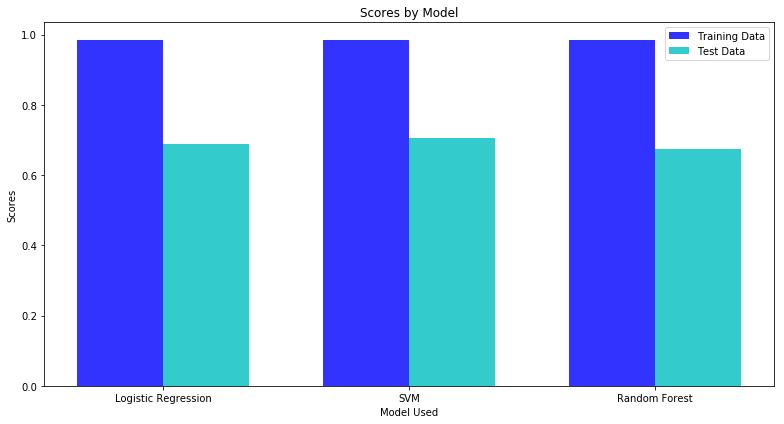

In [115]:
# data to plot
n_groups = 3
train_score = [log_clf.score(combined_3, y_train), 
          svm_clf.score(combined_3, y_train),
          rf_clf.score(combined_3, y_train)]
test_score = [log_clf.score(test_combined_3, y_test), 
          svm_clf.score(test_combined_3, y_test),
          rf_clf.score(test_combined_3, y_test)]

# create plot
fig, ax = plt.subplots(figsize=(11, 6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, train_score, bar_width,
alpha=opacity,
color='b',
label='Training Data')

rects2 = plt.bar(index + bar_width, test_score, bar_width,
alpha=opacity,
color='c',
label='Test Data')

plt.xlabel('Model Used')
plt.ylabel('Scores')
plt.title('Scores by Model')
plt.xticks(index + bar_width/2, ('Logistic Regression', 'SVM', 'Random Forest'))
plt.legend()

plt.tight_layout()
plt.show()